In [171]:
import pandas as pd
from matplotlib import pyplot as plt
from dm_test import dm_test
from tqdm import tqdm
import numpy as np

In [11]:
MLpred = pd.read_csv("ML_test_pred.csv")
MLrs = pd.read_csv('ML_test_res_rolling.csv')
NNpred = pd.read_csv("NN_test_pred.csv")
NNrs = pd.read_csv('NN_test_res_rolling.csv')`b

In [19]:
krx = '/data/hun/KRX_marketdata/'
factors= pd.read_csv(krx+'factors.csv')
factors['ticker'] = factors.ticker.apply(lambda x: '0'*(6-len(str(x)))+str(x))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [294]:
prices = pd.read_csv(krx+'prices_final.csv')
prices['ticker'] = prices.ticker.apply(lambda x: '0'*(6-len(str(x)))+str(x))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
factors =factors.dropna()
factors.reset_index(drop = True, inplace = True)
dates = factors.date.unique()[::-1]

In [21]:
length = len(dates)
ind_train = int(length*0.7)+2
ind_tv = int(length*0.4)

In [22]:
dates[ind_tv], dates[ind_train]

('2010/01', '2016/01')

In [16]:
preds = pd.concat([MLpred, NNpred], axis=1)

In [87]:
model_ml = MLrs.model.unique()
model_nn = NNrs.model.unique()
periods= [int(dates[i][:4]) for i in range(ind_tv, length, 12)]
periods

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# factor순서는 ticker순서임. 따로 real value뽑아줘야함. 

In [489]:
start8=0
start9=0
end9=0
real = np.array([])
cnt = ind_tv
for i in tqdm(range(12)):
    test_ind = dates[cnt:min(cnt+12, length)]
    temp = factors[factors.date.apply(lambda x: x in test_ind)].ret.values
    if i < 8:
        start8+= len(temp)
    if i ==8:
        start9 = start8+len(temp)
    if i==9:
        end9 = start9+len(temp)
    real = np.append(real, temp)

    cnt += 12

100%|██████████| 12/12 [00:22<00:00,  1.86s/it]


## R_squared

In [90]:
res = pd.DataFrame(index = periods)
for i in model_ml:
    temp = MLrs[MLrs.model == i].r_squared.rename(i)
    temp.index = periods
    res = pd.concat([res, temp], axis=1)
for j in model_nn:
    temp = NNrs[NNrs.model == j].r_squared.rename(j)
    temp.index = periods
    res = pd.concat([res, temp], axis=1)

In [423]:
# res.to_csv("[Results]R_sqared_time varies.csv")

In [191]:
def ros(predicted):
    predicted = np.append(predicted[:start9], predicted[end9:])
    real2 = np.append(real[:start9], real[end9:])
    ros = 1- ((predicted  - real2 )**2).mean()/(real2 **2).mean()
    return ros

In [192]:
for i in names:
    temp = preds[i].values
    print(ros(temp))

-0.6992166682337841
0.03727888426766779
-0.4289997703765971
0.12501212285531438
0.7514228564012072
0.6004097578706717
-4.030971141265137
0.2587911886086427
0.24822444255067033
0.43347499389344846
0.412726113463864


In [425]:
factors.columns

Index(['date', 'ticker', 'name', 'ret', 'RM_RF', 'smb', 'hml', 'div_ret',
       'PBR', 'EPR', 'BPR', 'size', 'share_turn', 'mom1', 'mom6', 'mom12',
       'beta', 'beta_seq', 'ido_vol', 'cd3m', 'term_spread', 'credit_spread',
       'trans_turn'],
      dtype='object')

In [426]:
factors.describe()

,ret,RM_RF,smb,hml,div_ret,PBR,EPR,BPR,size,share_turn,mom1,mom6,mom12,beta,beta_seq,ido_vol,cd3m,term_spread,credit_spread,trans_turn
count,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000,367098.000000
mean,0.022826,0.002942,0.029222,0.004118,1.271247,1.644664,0.083455,1.040695,0.500123,0.387793,0.023124,0.023249,0.022955,0.463410,28.214998,0.821128,2.661427,0.531033,0.706400,0.412380
std,0.892897,0.091250,0.043141,0.052979,1.989090,5.732081,0.656990,1.306708,0.288705,3.868207,0.896392,0.363790,0.256622,5.291533,3523.952771,89.935896,1.371765,0.549941,0.521864,4.920248
min,-0.985862,-0.887071,-0.046105,-0.479083,0.000000,0.000000,0.000000,0.000000,0.000434,0.000004,-0.985862,-0.459365,-0.406501,-670.942221,0.000000,0.000000,0.630000,-0.340000,0.220000,0.000004
25%,-0.070175,-0.038905,0.002915,-0.014061,0.000000,0.480000,0.000000,0.333333,0.250000,0.029265,-0.070295,-0.024374,-0.014802,-0.046389,0.050577,0.006902,1.580000,0.140000,0.430000,0.029537
50%,-0.004076,0.007577,0.019467,0.008086,0.410000,0.940000,0.042863,0.781250,0.500000,0.086005,-0.003953,0.004187,0.006765,0.357565,0.310596,0.014389,2.630000,0.410000,0.530000,0.087124
75%,0.071103,0.051134,0.042318,0.030847,1.920000,1.770000,0.104058,1.428571,0.750136,0.242060,0.071339,0.041642,0.036077,0.941776,1.221496,0.031341,3.550000,0.740000,0.830000,0.247815
max,437.666667,0.184805,0.341170,0.167935,57.920000,1044.000000,100.000000,100.000000,1.000000,855.512794,437.666667,72.884900,36.465624,974.667766,949977.254124,16318.994101,6.030000,2.470000,4.380000,1777.534815


In [431]:
factors.corr()

,ret,RM_RF,smb,hml,div_ret,PBR,EPR,BPR,size,share_turn,mom1,mom6,mom12,beta,beta_seq,ido_vol,cd3m,term_spread,credit_spread,trans_turn
ret,1.000000,0.028558,0.040014,-0.024498,-0.005351,-0.004567,0.004554,0.008136,-0.023735,0.010199,-0.004012,0.404638,0.285670,0.191623,0.227245,0.254847,-0.002363,0.004063,0.008720,0.009577
RM_RF,0.028558,1.000000,-0.010143,0.009684,0.017247,-0.010387,0.004870,0.021469,-0.000006,0.002092,-0.000835,0.011117,0.008333,-0.006128,-0.000372,0.000348,-0.022324,-0.003298,0.075420,0.001666
smb,0.040014,-0.010143,1.000000,-0.394583,0.016291,-0.012126,0.005378,0.010329,0.000137,-0.000656,0.013407,0.032200,0.022725,0.008530,0.004788,0.006426,0.072517,0.051234,0.035146,-0.001325
hml,-0.024498,0.009684,-0.394583,1.000000,0.017093,0.013124,0.004319,0.014557,0.000137,0.003147,0.003154,-0.017024,-0.014231,-0.001208,-0.003484,-0.005006,-0.055437,-0.016322,0.074881,0.002541
div_ret,-0.005351,0.017247,0.016291,0.017093,1.000000,-0.089171,0.039631,0.223978,0.008007,-0.034056,-0.005786,-0.030742,-0.044431,-0.004934,-0.004928,-0.005672,0.092566,0.044551,0.129051,-0.029164
PBR,-0.004567,-0.010387,-0.012126,0.013124,-0.089171,1.000000,-0.013835,-0.112775,0.110797,0.009587,-0.000212,0.021187,0.037206,-0.002521,-0.001119,-0.001669,-0.078496,-0.030718,-0.017520,0.008365
EPR,0.004554,0.004870,0.005378,0.004319,0.039631,-0.013835,1.000000,0.230700,0.016663,-0.006237,0.005642,0.007370,0.014444,0.003151,-0.000855,-0.000802,0.038916,0.014718,0.015822,-0.005278
BPR,0.008136,0.021469,0.010329,0.014557,0.223978,-0.112775,0.230700,1.000000,-0.035073,-0.024263,0.007080,-0.010500,-0.020246,0.004708,-0.004416,-0.003858,0.068995,0.045373,0.105799,-0.020887
size,-0.023735,-0.000006,0.000137,0.000137,0.008007,0.110797,0.016663,-0.035073,1.000000,-0.068454,0.011657,0.007840,0.014085,-0.000993,-0.010026,-0.011883,-0.000322,-0.000384,-0.000008,-0.059856
share_turn,0.010199,0.002092,-0.000656,0.003147,-0.034056,0.009587,-0.006237,-0.024263,-0.068454,1.000000,0.012063,0.017395,0.015689,0.026006,0.006638,0.007799,-0.024533,-0.006288,0.004714,0.955135


## complexity

In [32]:
def comp(name):
    res = MLrs[MLrs.model == name]
    return res.complexity

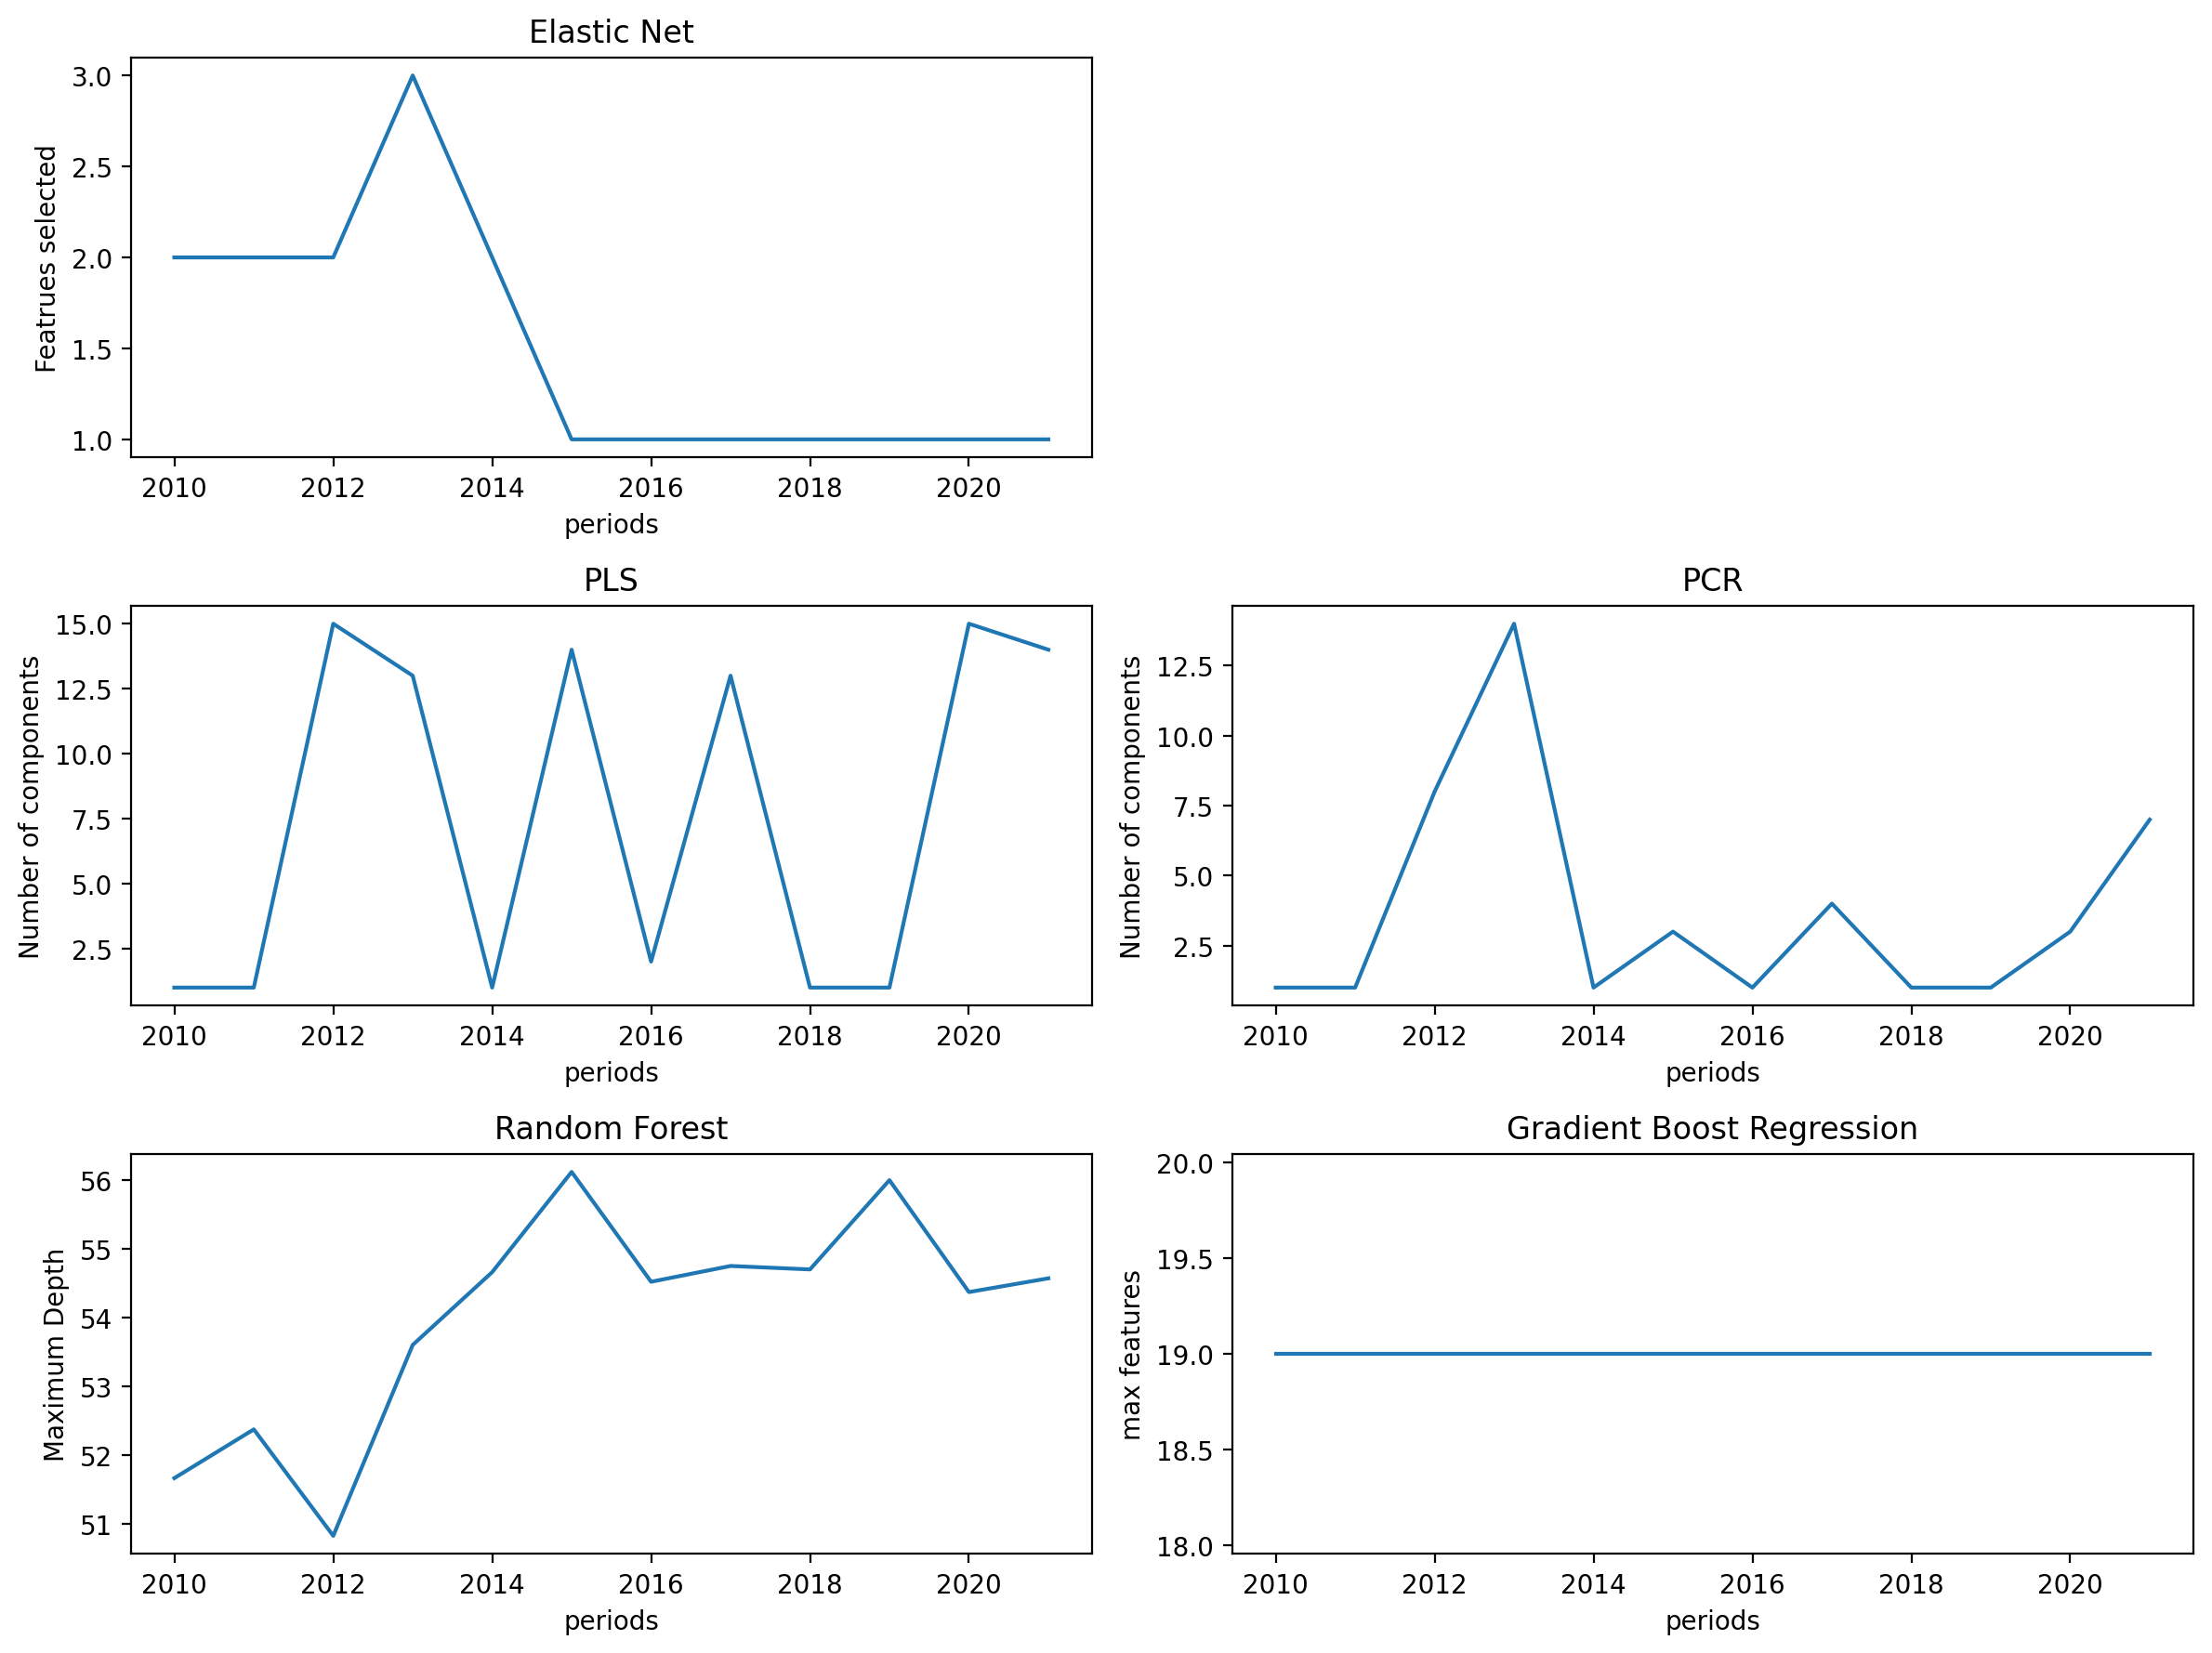

In [62]:
fig = plt.figure(figsize =(12,9), dpi = 200)

# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(3,2,1)
ax1.set(title='Elastic Net', ylabel='Featrues selected' ,xlabel = 'periods')
ax1.plot(periods, comp('en'))

ax2 = fig.add_subplot(3,2,3)
ax2.set(title='PLS', ylabel='Number of components' ,xlabel = 'periods')
ax2.plot(periods, comp('pls'))

ax3 = fig.add_subplot(3,2,4)
ax3.set(title='PCR', ylabel='Number of components' ,xlabel = 'periods')
ax3.plot(periods, comp('pcr'))

ax4 = fig.add_subplot(3,2,5)
ax4.set(title='Random Forest', ylabel='Maximum Depth' ,xlabel = 'periods')
ax4.plot(periods, comp('rf'))

ax5 = fig.add_subplot(3,2,6)
ax5.set(title='Gradient Boost Regression', ylabel='max features' ,xlabel = 'periods')
ax5.plot(periods, comp('gbr'))

fig.tight_layout()
fig.show()

## DM test

In [110]:
len(preds), len(real)

(255956, 255956)

In [111]:
names = preds.columns

In [ ]:
dm_res.to_csv("[results]dm_stat2.csv")

In [235]:
p_res.to_csv("[results]p_value2.csv")

## 포트폴리오 만들어서 분석

In [310]:
date_order = np.array([])
ticker_order = np.array([])
name_order = np.array([])
returns = np.array([])
beta = np.array([])
cnt = ind_tv
for i in tqdm(range(12)):
    test_ind = dates[cnt:min(cnt+12, length)]
    temp = factors[factors.date.apply(lambda x: x in test_ind)]
    date_order = np.append(date_order, temp.date.values)
    ticker_order = np.append(ticker_order, temp.ticker.values)
    name_order = np.append(name_order, temp.name.values)
    returns = np.append(returns, temp.ret.values)
    beta = np.append(beta, temp.beta.values)
    cnt += 12

100%|██████████| 12/12 [00:25<00:00,  2.16s/it]


In [384]:
real_date2 = pd.DataFrame({'date':date_order, 'ticker':ticker_order, 'name':name_order,
                         'ret':returns, 'beta':beta})

In [385]:
real_date2 = pd.merge(real_date2, prices[['date','ticker','ret','smb*hml']], how='left', on =['date','ticker'])

In [382]:
len(real_date)

255956

In [393]:
non = real_date[real_date['smb*hml'].isna()]
ind_non = non.index

In [395]:
def find_miss(dateticker):
    return real_date2[(real_date2.ticker == dateticker.ticker ) & (real_date2.date == dateticker.date)]['smb*hml'].values[0]

In [400]:
real_date.loc[ind_non, 'smb*hml'] = non.apply(find_miss, axis=1)

In [403]:
real_date.to_csv('[result]portfolio_file.csv', index=False)

In [408]:
ports = pd.concat([real_date, preds], axis =1)

In [416]:
ports
ross = pd.DataFrame(columns = names)
ress = []
for i in range(1,7):
    stock = ports[ports['smb*hml']==i]
    r = [rs(stock.ret, stock[name]) for name in names]
    ress.append(r)

In [420]:
pd.DataFrame(ress, columns = names).to_csv('FF3_portfolios.csv')

In [413]:
names

Index(['lin', 'en', 'pls', 'pcr', 'rf', 'gbr', 'Net1', 'Net2', 'Net3', 'Net4',
       'Net5'],
      dtype='object')

In [414]:
def rs(pre, re):
    ros = 1- ((pre - re )**2).mean()/(re **2).mean()
    return ros

In [421]:
r2 = [rs(real_date.ret, preds[name]) for name in names]


In [422]:
r2

[-0.18181292180883735,
 -0.6925911393319162,
 -0.3188462089517905,
 -2.9190732270647772,
 0.710193540949366,
 0.5833482233780717,
 0.0015359941996152537,
 -0.038600154418137356,
 -0.1886684016919653,
 0.0976226802236384,
 -0.050738713704968186]

In [434]:
d_temp = ports.date.unique()

In [509]:
ports = pd.concat([ports, nn3], axis=1)

In [515]:
names = np.append(np.array(names), ['net6'])

In [516]:
names

array(['lin', 'en', 'pls', 'pcr', 'rf', 'gbr', 'Net1', 'Net2', 'Net3',
       'Net4', 'Net5', 'net6'], dtype=object)

In [517]:
rnk= pd.DataFrame()
for i in names:
    size_rnk = ports[i].rank(pct=True)
    ports[i+'bin'] = pd.cut(size_rnk, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                            include_lowest=True, labels=[1,2,3,4,5,6,7,8,9,10]).astype('int')

In [518]:
mlport = pd.DataFrame()
for i in names:
    temp = []
    for j in range(1,11):
        po = ports[ports[i+'bin']==j]
        po_pred = po[i].mean()
        po_avg = po.ret.mean()
        po_std = po.ret.std()
        po_sr = po_avg/po_std
        temp.append([po_pred, po_avg, po_std, po_sr])
    temp2 = pd.DataFrame(temp,columns = [i+'_pred',i+'_avg',i+'_std',i+'_SR'])
    mlport = pd.concat([mlport, temp2], axis=1)

In [445]:
mlport.to_csv('ml_portfolios.csv')

In [457]:
mlport2_short = pd.DataFrame()
for i in names:
    temp = []

    po1 = ports[ports[i+'bin']==1][['ret',i]]
    po2 = ports[ports[i+'bin']==10][['ret',i]]
    po = pd.concat([-po1,po2])
    
    po_pred = po[i].mean()
    po_avg = po.ret.mean()
    po_std = po.ret.std()
    po_sr = po_avg/po_std
    temp.append([po_pred, po_avg, po_std, po_sr])
    temp2 = pd.DataFrame(temp,columns = [i+'_pred',i+'_avg',i+'_std',i+'_SR'])
    mlport2_short = pd.concat([mlport2_short, temp2], axis=1)

In [463]:
mlport2_short.to_csv('ml_ports_short.csv')

In [468]:
po.std()

ret     0.763475
Net5    1.372454
dtype: float64

In [502]:
nn2= pd.read_csv("NN_test_res_rolling0_11.csv")
nn3= pd.read_csv("NN_test_pred_net6.csv")

In [504]:
ros(nn3)

0.40966370898887194

In [484]:
res1

,0,1,2,3,4
0,-0.002951,-1.823570,-2.356317,-2.174888,-0.237975
1,-0.000048,-3.000605,-5.168981,-3.966855,-5.948204


In [507]:
temp = []
size_rnk = nn3['net6'].rank(pct=True)
nn3['net6'+'bin'] = pd.cut(size_rnk, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                        include_lowest=True, labels=[1,2,3,4,5,6,7,8,9,10]).astype('int')
for j in range(1,11):
    po = nn3[nn3['net6'+'bin']==j]
    po_pred = po['net6'].mean()
    po_avg = po.ret.mean()
    po_std = po.ret.std()
    po_sr = po_avg/po_std
    temp.append([po_pred, po_avg, po_std, po_sr])
temp2 = pd.DataFrame(temp,columns = [i+'_pred',i+'_avg',i+'_std',i+'_SR'])

AttributeError: 'DataFrame' object has no attribute 'ret'

In [506]:
nn3

,net6
0,-0.034088
1,-0.067924
2,0.022074
3,-0.014111
4,-0.050430
...,...
255951,-0.003329
255952,-0.017547
255953,-0.017214
255954,-0.017447


In [519]:
mlport

,lin_pred,lin_avg,lin_std,lin_SR,en_pred,en_avg,en_std,en_SR,pls_pred,pls_avg,...,Net4_std,Net4_SR,Net5_pred,Net5_avg,Net5_std,Net5_SR,net6_pred,net6_avg,net6_std,net6_SR
0,-0.221569,-0.059065,0.157877,-0.374118,0.000207,0.016419,0.172893,0.094969,-0.166583,-0.053828,...,0.357998,-0.200734,-0.170397,-0.082195,0.209638,-0.392082,-0.094822,-0.065831,0.217550,-0.302599
1,-0.083487,-0.034699,0.122420,-0.283441,0.014093,0.021686,0.215483,0.100641,-0.062709,-0.034769,...,0.376806,-0.109869,-0.064978,-0.045121,0.126082,-0.357868,-0.042006,-0.016958,0.319546,-0.053070
2,-0.041247,-0.021262,0.103130,-0.206163,0.014751,0.013423,0.164916,0.081392,-0.032465,-0.021207,...,0.108515,-0.238018,-0.038656,-0.034025,0.104166,-0.326647,-0.027820,-0.014449,0.117319,-0.123157
3,-0.019572,-0.015887,0.111232,-0.142832,0.015601,0.019040,0.196072,0.097109,-0.013628,-0.011851,...,0.109062,-0.104724,-0.020371,-0.016899,0.103891,-0.162658,-0.016585,0.004354,0.106587,0.040850
4,-0.004230,-0.008762,0.115771,-0.075687,0.017795,0.007030,0.155646,0.045167,0.001205,-0.005459,...,0.104205,0.005907,-0.005609,-0.003340,0.094777,-0.035245,-0.001878,0.012284,0.114536,0.107253
5,0.009346,0.002023,0.121071,0.016708,0.018125,0.014909,0.150751,0.098897,0.014478,0.002903,...,0.108948,0.092402,0.008145,0.010571,0.100867,0.104799,0.012177,0.035887,0.177370,0.202331
6,0.023365,0.018464,0.131117,0.140819,0.018515,0.003034,0.155062,0.019569,0.027663,0.015076,...,0.116377,0.207535,0.021873,0.025426,0.224383,0.113316,0.019239,0.012600,0.181448,0.069439
7,0.039635,0.038532,0.142409,0.270574,0.022390,0.012956,0.249386,0.051953,0.042626,0.036046,...,0.126026,0.305792,0.041409,0.040964,0.124849,0.328112,0.041242,0.038027,0.146614,0.259368
8,0.064167,0.074820,0.178377,0.419450,0.028177,0.013515,0.219335,0.061619,0.065885,0.076945,...,0.151216,0.414014,0.076620,0.072882,0.335630,0.217151,0.077166,0.040219,0.157421,0.255486
9,0.280346,0.189638,1.116914,0.169788,0.053138,0.061792,1.061904,0.058190,0.284841,0.179946,...,1.017201,0.194982,0.338389,0.215538,1.054966,0.204308,0.229573,0.144470,1.061986,0.136037
